In [2]:
!pip install mir_eval

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 87 kB 2.0 MB/s eta 0:00:011
  Created wheel for mir-eval: filename=mir_eval-0.6-py3-none-any.whl size=96514 sha256=060b0a6914585a1f629e9f10ad38cacbe0937cf350c501bf3f85fa1e3de62156
  Stored in directory: /tmp/pip-ephem-wheel-cache-guz106y0/wheels/33/84/cf/b9da5f4e21a4d2ae3112774eb27ffd40fbd63cb68fc3195bf5
Successfully built mir-eval


In [3]:
%matplotlib inline
import mir_eval, librosa, numpy, matplotlib.pyplot as plt

[&larr; Back to Index](index.html)

# Evaluation using `mir_eval`

`mir_eval` ([documentation](http://craffel.github.io/mir_eval/), [paper](http://colinraffel.com/publications/ismir2014mir_eval.pdf)) is a Python library containing evaluation functions for a variety of common audio and music processing tasks. 

`mir_eval` was primarily created by Colin Raffel. This notebook was created by Brian McFee and edited by Steve Tjoa.

## Why `mir_eval`?

Most tasks in MIR are complicated. Evaluation is also complicated!

Any given task has many ways to evaluate a system. There is no one right away.

For example, here are issues to consider when choosing an evaluation method:

- event matching
- time padding
- tolerance windows
- vocabulary alignment

## `mir_eval` tasks and submodules

- onset, tempo, beat
- chord, key
- melody, multipitch
- transcription
- segment, hierarchy, pattern
- separation (like `bss_eval` in Matlab)

## Install `mir_eval`

    pip install mir_eval

If that doesn't work:

    pip install --no-deps mir_eval

## More than metrics

mir_eval has tools for display and sonification.

In [4]:
import librosa.display
import mir_eval.display

Common plots: `events`, `labeled_intervals`

pitch, multipitch, piano_roll
segments, hierarchy,
separation

### Example: Events

In [5]:
librosa.display.specshow(S, x_axis='time', y_axis='mel')
mir_eval.display.events(ref_beats, color='w', alpha=0.8, linewidth=3)
mir_eval.display.events(est_beats, color='c', alpha=0.8, linewidth=3, linestyle='--')

NameError: name 'S' is not defined

### Example: Labeled Intervals

### Example: Source Separation

In [7]:
#help(librosa.effects.hpss)

Help on function hpss in module librosa.effects:

hpss(y, **kwargs)
    Decompose an audio time series into harmonic and percussive components.
    
    This function automates the STFT->HPSS->ISTFT pipeline, and ensures that
    the output waveforms have equal length to the input waveform ``y``.
    
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)]
        audio time series
    
    kwargs : additional keyword arguments.
        See `librosa.decompose.hpss` for details.
    
    
    Returns
    -------
    y_harmonic : np.ndarray [shape=(n,)]
        audio time series of the harmonic elements
    
    y_percussive : np.ndarray [shape=(n,)]
        audio time series of the percussive elements
    
    See Also
    --------
    harmonic : Extract only the harmonic component
    percussive : Extract only the percussive component
    librosa.decompose.hpss : HPSS on spectrograms
    
    
    Examples
    --------
    >>> # Extract harmonic and percussive components
   

In [8]:
!ls audio

125_bounce.wav			c_strum.wav	  simple_piano.wav
58bpm.wav			drum_samples	  sir_duke_piano_fast.mp3
brahms_hungarian_dance_5.mp3	funk_groove.mp3   sir_duke_piano_slow.mp3
busta_rhymes_hits_for_days.mp3	jangle_pop.mp3	  sir_duke_trumpet_fast.mp3
clarinet_c6.wav			latin_groove.mp3  sir_duke_trumpet_slow.mp3
classic_rock_beat.mp3		oboe_c6.wav	  thx_original.mp3
classic_rock_beat.wav		prelude_cmaj.wav  tone_440.wav
conga_groove.wav		README.md
cowbell.wav			simple_loop.wav


In [17]:
import IPython.display as ipd
y, sr = librosa.load('audio/funk_groove.mp3')
print(y, sr)
ipd.Audio(y, rate=sr)

/home/cjbayron/virtualenvs/pytorch/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[0. 0. 0. ... 0. 0. 0.] 22050


In [18]:
y_harm, y_perc = librosa.effects.hpss(y, margin=8)

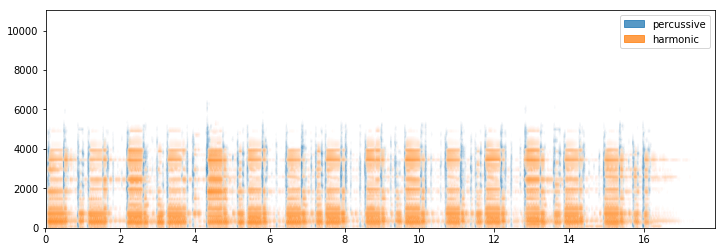

In [19]:
plt.figure(figsize=(12, 4))
mir_eval.display.separation([y_perc, y_harm], sr, labels=['percussive', 'harmonic'])
plt.legend()

In [ ]:
Audio(data=numpy.vstack([

In [20]:
mir_eval.sonify.chords()

TypeError: chords() missing 3 required positional arguments: 'chord_labels', 'intervals', and 'fs'

[&larr; Back to Index](index.html)